# Data Exploration and Preparation for PCA
## Sub-Saharan Africa World Development Indicators

This notebook explores and prepares the World Bank data for Principal Component Analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

## Step 1: Load the Data

In [2]:
# Load the main dataset
data = pd.read_csv('API_SSF_DS2_en_csv_v2_1688.csv', skiprows=4)

print(f"Dataset shape: {data.shape}")
print(f"\nColumn names:")
print(data.columns.tolist())

Dataset shape: (1513, 70)

Column names:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [3]:
# Display first few rows
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Sub-Saharan Africa,SSF,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,4.8,4.8,4.800000,4.800000,4.800000,4.800000,4.700000,4.500000,4.400000,4.400000,4.50000,4.700000,4.600000,NaN,NaN
1,Sub-Saharan Africa,SSF,Voice and Accountability: Standard Error,VA.STD.ERR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sub-Saharan Africa,SSF,Voice and Accountability: Number of Sources,VA.NO.SRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sub-Saharan Africa,SSF,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.193117,5.619871,6.037467,5.534489,5.585531,6.381793,6.469451,5.428935,4.74067,5.682944,5.027276,NaN,NaN
4,Sub-Saharan Africa,SSF,Export value index (2015 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Load Metadata for Better Understanding

In [4]:
# Load indicator metadata
metadata_indicator = pd.read_csv('Metadata_Indicator_API_SSF_DS2_en_csv_v2_1688.csv')

print(f"Number of indicators with metadata: {len(metadata_indicator)}")
metadata_indicator.head()

Number of indicators with metadata: 1513


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...",An intentional homicide is defined as an unlaw...,UNODC Research - Data Portal – Intentional Hom...,NaN
1,VA.STD.ERR,Voice and Accountability: Standard Error,The Worldwide Governance Indicators (WGI) are ...,"Worldwide Governance Indicators, World Bank (W...",NaN
2,VA.NO.SRC,Voice and Accountability: Number of Sources,The Worldwide Governance Indicators (WGI) are ...,"Worldwide Governance Indicators, World Bank (W...",NaN
3,TX.VAL.TECH.MF.ZS,High-technology exports (% of manufactured exp...,High-technology exports are products with high...,"Comtrade database, United Nations (UN), uri: c...",NaN
4,TX.VAL.MRCH.XD.WD,Export value index (2015 = 100),Export values are the current value of exports...,UN Conference on Trade and Development (UNCTAD),NaN


## Step 3: Explore Data Structure and Missing Values

In [5]:
# Check data types
print("Data types:")
print(data.dtypes)

Data types:
Country Name          str
Country Code          str
Indicator Name        str
Indicator Code        str
1960              float64
                   ...   
2021              float64
2022              float64
2023              float64
2024              float64
Unnamed: 69       float64
Length: 70, dtype: object


In [6]:
# Identify non-numeric columns
non_numeric_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
year_columns = [col for col in data.columns if col not in non_numeric_cols + ['Unnamed: 69']]

print(f"Non-numeric columns: {non_numeric_cols}")
print(f"\nYear columns (numeric): {len(year_columns)} columns from {year_columns[0]} to {year_columns[-1]}")

Non-numeric columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

Year columns (numeric): 65 columns from 1960 to 2024


In [7]:
# Check missing values in year columns
missing_pct = data[year_columns].isnull().sum() / len(data) * 100

print("Missing values percentage by year:")
print(missing_pct.sort_values(ascending=True).head(10))
print("\nMost complete years:")
print(missing_pct.sort_values(ascending=True).tail(10))

Missing values percentage by year:
2015    46.596167
2014    47.323199
2010    47.389293
2018    47.785856
2016    47.851950
2017    48.380701
2012    48.512888
2019    48.909451
2013    49.107733
2011    49.107733
dtype: float64

Most complete years:
1969    87.508262
1967    87.772637
1968    87.838731
1965    88.037013
1966    88.103106
1964    88.764045
1963    88.830139
1962    89.028420
1961    89.028420
1960    90.350297
dtype: float64


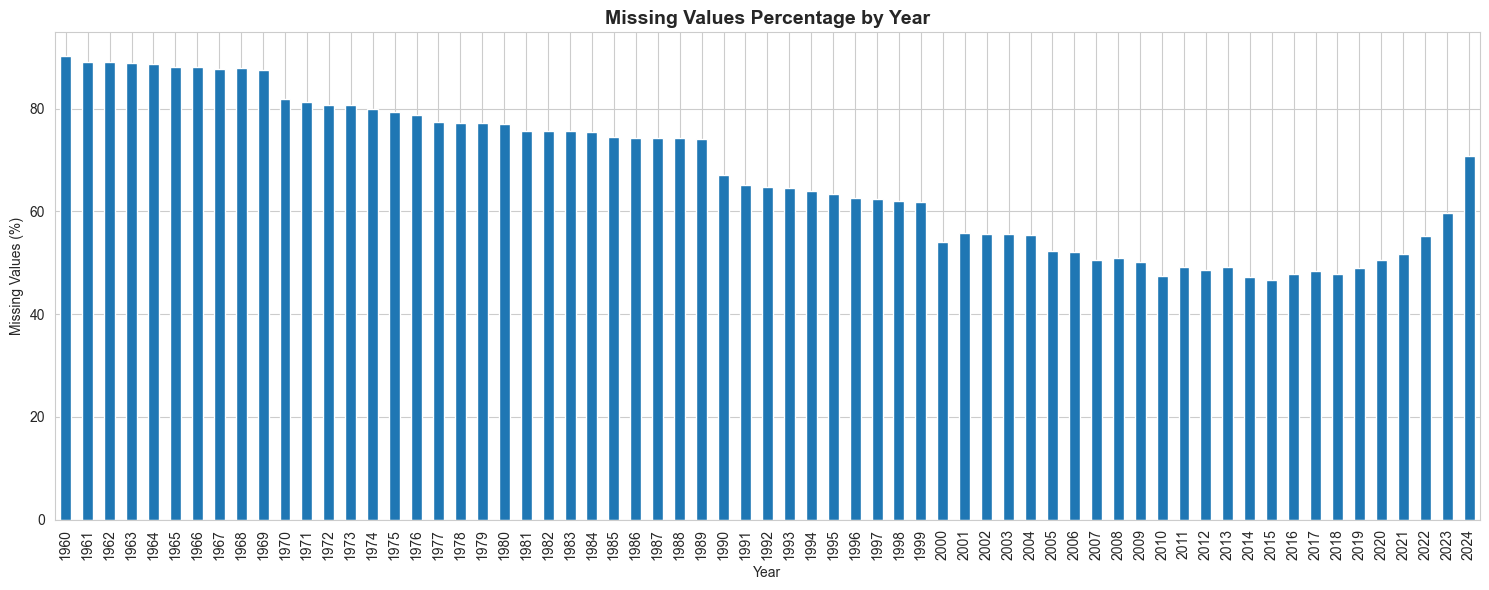

In [8]:
# Visualize missing values by year
plt.figure(figsize=(15, 6))
missing_pct.plot(kind='bar')
plt.title('Missing Values Percentage by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Step 4: Analyze Missing Values by Indicator

In [9]:
# Calculate missing values percentage for each indicator
data['missing_pct'] = data[year_columns].isnull().sum(axis=1) / len(year_columns) * 100

# Sort by missing values
data_sorted = data.sort_values('missing_pct')

print(f"Total indicators: {len(data)}")
print(f"\nIndicators with complete data: {len(data[data['missing_pct'] == 0])}")
print(f"Indicators with <50% missing: {len(data[data['missing_pct'] < 50])}")
print(f"Indicators with >90% missing: {len(data[data['missing_pct'] > 90])}")

Total indicators: 1513

Indicators with complete data: 77
Indicators with <50% missing: 532
Indicators with >90% missing: 711


In [10]:
# Display indicators with least missing values
print("Top 20 indicators with most complete data:")
print(data_sorted[['Indicator Name', 'Indicator Code', 'missing_pct']].head(20))

Top 20 indicators with most complete data:
                                         Indicator Name     Indicator Code  \
35    Population ages 50-54, male (% of male populat...  SP.POP.5054.MA.5Y   
28           Population, female (% of total population)  SP.POP.TOTL.FE.ZS   
31    Population ages 75-79, male (% of male populat...  SP.POP.7579.MA.5Y   
30    Age dependency ratio (% of working-age populat...        SP.POP.DPND   
32    Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
36    Population ages 40-44, male (% of male populat...  SP.POP.4044.MA.5Y   
37    Population ages 30-34, male (% of male populat...  SP.POP.3034.MA.5Y   
933                                   Population, total        SP.POP.TOTL   
926                        Merchandise trade (% of GDP)  TG.VAL.TOTL.GD.ZS   
929            Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
42    Population ages 0-14, male (% of male population)  SP.POP.0014.MA.ZS   
43    Population ages

## Step 5: Select Recent Years with More Complete Data

In [11]:
# Focus on recent years (2000-2023) as they tend to have more complete data
recent_years = [str(year) for year in range(2000, 2024)]
available_recent = [year for year in recent_years if year in year_columns]

print(f"Analyzing years: {available_recent[0]} to {available_recent[-1]}")
print(f"Number of years: {len(available_recent)}")

Analyzing years: 2000 to 2023
Number of years: 24


In [12]:
# Calculate missing values for recent years only
data['missing_pct_recent'] = data[available_recent].isnull().sum(axis=1) / len(available_recent) * 100

# Filter indicators with less than 30% missing values in recent years
good_indicators = data[data['missing_pct_recent'] < 30]

print(f"Indicators with <30% missing in recent years: {len(good_indicators)}")
print(f"\nSample indicators:")
print(good_indicators[['Indicator Name', 'missing_pct_recent']].head(15))

Indicators with <30% missing in recent years: 713

Sample indicators:
                                       Indicator Name  missing_pct_recent
5   Merchandise exports to low- and middle-income ...            0.000000
6   Merchandise exports to low- and middle-income ...            0.000000
7                   Merchandise exports (current US$)            0.000000
8   Insurance and financial services (% of commerc...            0.000000
9   Agricultural raw materials exports (% of merch...            8.333333
11  Computer, communications and other services (%...            0.000000
12  Merchandise imports by the reporting economy, ...            0.000000
13  Merchandise imports from low- and middle-incom...            0.000000
14  Merchandise imports from high-income economies...            0.000000
15    Manufactures imports (% of merchandise imports)            0.000000
16            Food imports (% of merchandise imports)            0.000000
23  International tourism, receipts for pa

## Step 6: Prepare Data for PCA

For PCA, we need:
- Rows: Observations (we'll use years as observations)
- Columns: Features (we'll use different indicators as features)
- Only numeric data
- Handle missing values appropriately

In [13]:
# Select top indicators with most complete data (at least 15 for good PCA)
num_indicators = 20  # Select top 20 indicators
selected_indicators = good_indicators.nsmallest(num_indicators, 'missing_pct_recent')

print(f"Selected {num_indicators} indicators:")
for idx, row in selected_indicators.iterrows():
    print(f"- {row['Indicator Name']} ({row['missing_pct_recent']:.1f}% missing)")

Selected 20 indicators:
- Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports) (0.0% missing)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports) (0.0% missing)
- Merchandise exports (current US$) (0.0% missing)
- Insurance and financial services (% of commercial service exports) (0.0% missing)
- Computer, communications and other services (% of commercial service imports) (0.0% missing)
- Merchandise imports by the reporting economy, residual (% of total merchandise imports) (0.0% missing)
- Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports) (0.0% missing)
- Merchandise imports from high-income economies (% of total merchandise imports) (0.0% missing)
- Manufactures imports (% of merchandise imports) (0.0% missing)
- Food imports (% of merchandise imports) (0.0% missing)
- Urban population gro

In [14]:
# Create a transposed dataframe: years as rows, indicators as columns
selected_data = selected_indicators[['Indicator Name'] + available_recent].set_index('Indicator Name')

# Transpose: years as rows, indicators as columns
pca_data = selected_data.T

print(f"PCA data shape: {pca_data.shape}")
print(f"Rows (observations): {pca_data.shape[0]} years")
print(f"Columns (features): {pca_data.shape[1]} indicators")
print(f"\nFirst few rows:")
pca_data.head()

PCA data shape: (24, 20)
Rows (observations): 24 years
Columns (features): 20 indicators

First few rows:


Indicator Name,Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Merchandise exports (current US$),Insurance and financial services (% of commercial service exports),"Computer, communications and other services (% of commercial service imports)","Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports),Merchandise imports from high-income economies (% of total merchandise imports),Manufactures imports (% of merchandise imports),Food imports (% of merchandise imports),Urban population growth (annual %),"Population, female (% of total population)",Age dependency ratio (% of working-age population),"Population ages 75-79, male (% of male population)",Population ages 65 and above (% of total population),"Population ages 65 and above, female (% of female population)","Population ages 60-64, male (% of male population)","Population ages 50-54, male (% of male population)","Population ages 40-44, male (% of male population)","Population ages 30-34, male (% of male population)"
2000,14.554548,0.253925,9.526914e+10,5.756433,30.526571,0.039516,1.999294,66.083733,65.990919,12.502286,4.017799,50.530379,91.683856,0.448433,2.999621,3.301436,1.559701,2.569774,3.985142,6.027084
2001,14.064753,0.082889,9.059408e+10,5.284099,32.047382,0.046969,2.642309,65.815117,65.778034,13.223241,4.085939,50.514955,91.335563,0.448116,2.995339,3.301073,1.556379,2.560868,4.002642,6.054031
2002,15.883310,0.239403,9.659724e+10,3.844079,32.603057,0.039177,2.331307,64.773943,67.670222,13.371448,4.123941,50.495800,91.017015,0.448763,2.991318,3.300617,1.553515,2.553865,4.018296,6.079707
2003,18.833485,0.257466,1.181937e+11,3.705136,29.113823,0.017389,2.564815,61.509978,66.153150,13.465554,4.160411,50.472422,90.720033,0.450363,2.987050,3.299366,1.551252,2.553509,4.028070,6.102200
2004,20.271411,0.640484,1.599013e+11,4.455624,27.380443,0.058662,2.895586,60.190008,66.523930,12.071317,4.210697,50.449314,90.451396,0.452308,2.981896,3.296565,1.550257,2.557050,4.032438,6.121583


## Step 7: Handle Missing Values

In [15]:
# Check missing values in the transposed data
missing_summary = pd.DataFrame({
    'Missing_Count': pca_data.isnull().sum(),
    'Missing_Percent': pca_data.isnull().sum() / len(pca_data) * 100
})

print("Missing values per indicator:")
print(missing_summary.sort_values('Missing_Percent', ascending=False))

Missing values per indicator:
                                                    Missing_Count  \
Indicator Name                                                      
Merchandise exports to low- and middle-income e...              0   
Merchandise exports to low- and middle-income e...              0   
Merchandise exports (current US$)                               0   
Insurance and financial services (% of commerci...              0   
Computer, communications and other services (% ...              0   
Merchandise imports by the reporting economy, r...              0   
Merchandise imports from low- and middle-income...              0   
Merchandise imports from high-income economies ...              0   
Manufactures imports (% of merchandise imports)                 0   
Food imports (% of merchandise imports)                         0   
Urban population growth (annual %)                              0   
Population, female (% of total population)                      0   
Age 

In [19]:
# Handle missing values using forward fill then backward fill
# This is appropriate for time series data
pca_data_filled = pca_data.ffill().bfill()

# If still any missing, fill with column mean
pca_data_filled = pca_data_filled.fillna(pca_data_filled.mean())

# Verify no missing values remain
print(f"Missing values after handling: {pca_data_filled.isnull().sum().sum()}")
print(f"\nFinal data shape: {pca_data_filled.shape}")

Missing values after handling: 0

Final data shape: (24, 20)


## Step 8: Basic Statistics and Visualization

In [20]:
# Display basic statistics
print("Descriptive statistics:")
pca_data_filled.describe()

Descriptive statistics:


Indicator Name,Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Merchandise exports (current US$),Insurance and financial services (% of commercial service exports),"Computer, communications and other services (% of commercial service imports)","Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports),Merchandise imports from high-income economies (% of total merchandise imports),Manufactures imports (% of merchandise imports),Food imports (% of merchandise imports),Urban population growth (annual %),"Population, female (% of total population)",Age dependency ratio (% of working-age population),"Population ages 75-79, male (% of male population)",Population ages 65 and above (% of total population),"Population ages 65 and above, female (% of female population)","Population ages 60-64, male (% of male population)","Population ages 50-54, male (% of male population)","Population ages 40-44, male (% of male population)","Population ages 30-34, male (% of male population)"
count,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.174235,0.675362,2.978384e+11,6.802108,33.717233,0.034829,2.585944,54.413850,64.512648,12.882017,3.937495,50.313288,87.399404,0.449317,3.003049,3.326074,1.583492,2.664740,4.209210,6.371110
std,3.382032,0.308251,1.195427e+11,2.689458,4.113690,0.046144,0.429454,6.088066,2.658500,1.131090,0.193726,0.124041,3.491202,0.005220,0.057485,0.072566,0.050475,0.110057,0.205214,0.220040
min,14.064753,0.082889,9.059408e+10,3.705136,27.380443,0.000473,1.999294,45.733374,57.940826,10.644026,3.580100,50.156680,79.937871,0.440870,2.950494,3.264992,1.542723,2.553509,3.985142,6.027084
25%,18.938073,0.600886,2.276487e+11,5.114191,30.401692,0.002706,2.274197,49.730297,62.899436,12.182403,3.811044,50.200734,85.197221,0.444911,2.963643,3.280020,1.550908,2.568834,4.037063,6.158281
50%,21.588496,0.655081,3.063844e+11,5.719407,33.230409,0.012179,2.521529,52.747763,65.038286,12.580617,3.933045,50.297720,88.437134,0.449563,2.984473,3.297966,1.554947,2.634720,4.142477,6.405139
75%,23.375501,0.736900,4.005807e+11,7.578915,37.023925,0.047153,2.886918,59.108662,66.065391,13.494003,4.095439,50.413266,90.117033,0.453288,3.009712,3.337620,1.603090,2.728999,4.330899,6.583728
max,27.136653,1.518482,4.586872e+11,12.578150,43.929840,0.180650,3.729571,66.083733,68.432596,14.994752,4.210697,50.530379,91.683856,0.459023,3.155282,3.518874,1.703035,2.899329,4.643782,6.657568


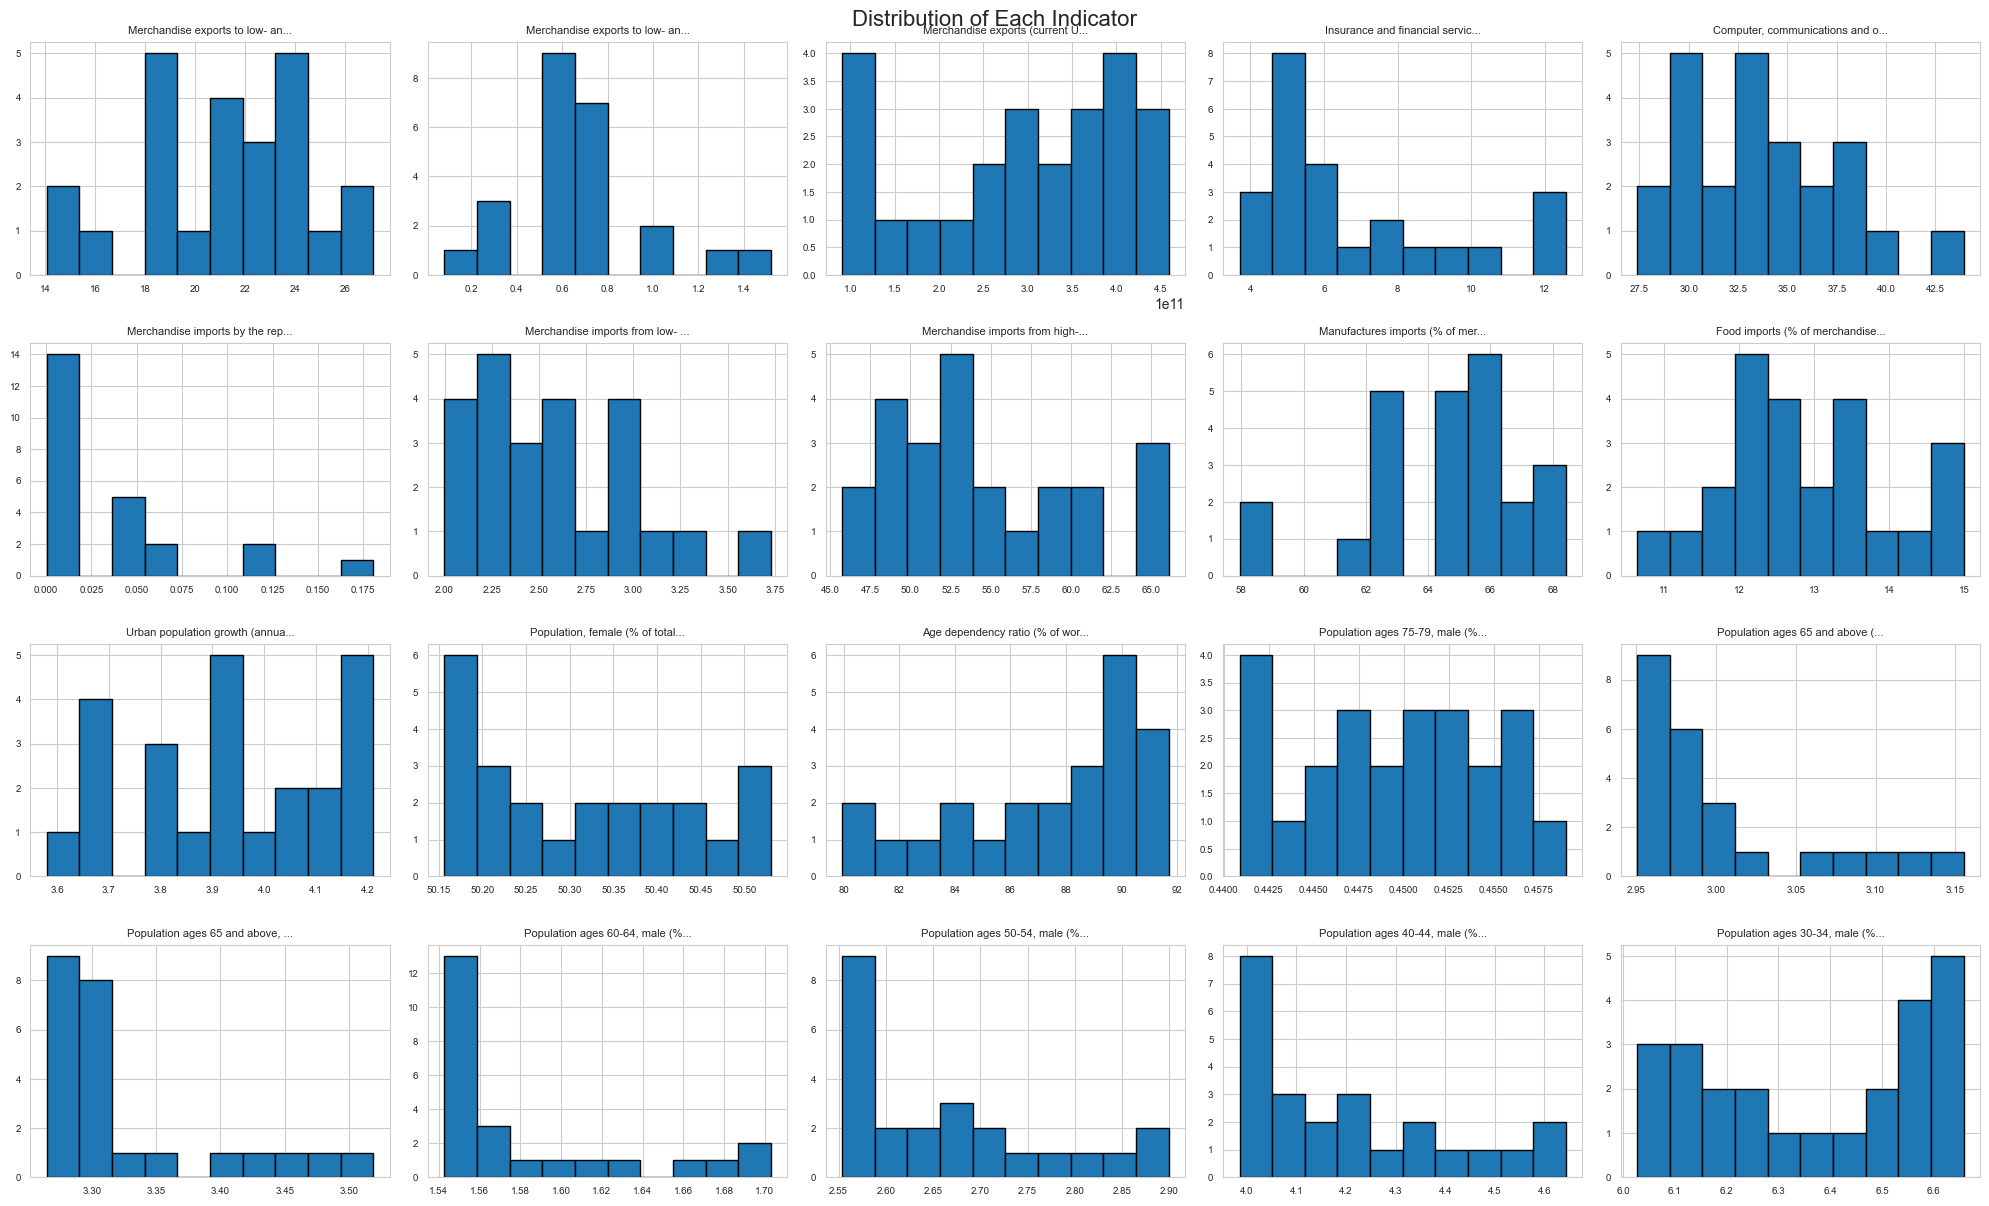

In [21]:
# Visualize data distribution
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.ravel()

for idx, col in enumerate(pca_data_filled.columns):
    axes[idx].hist(pca_data_filled[col], bins=10, edgecolor='black')
    axes[idx].set_title(col[:30] + '...', fontsize=8)
    axes[idx].tick_params(labelsize=7)

plt.tight_layout()
plt.suptitle('Distribution of Each Indicator', fontsize=16, y=1.001)
plt.show()

## Step 9: Correlation Analysis

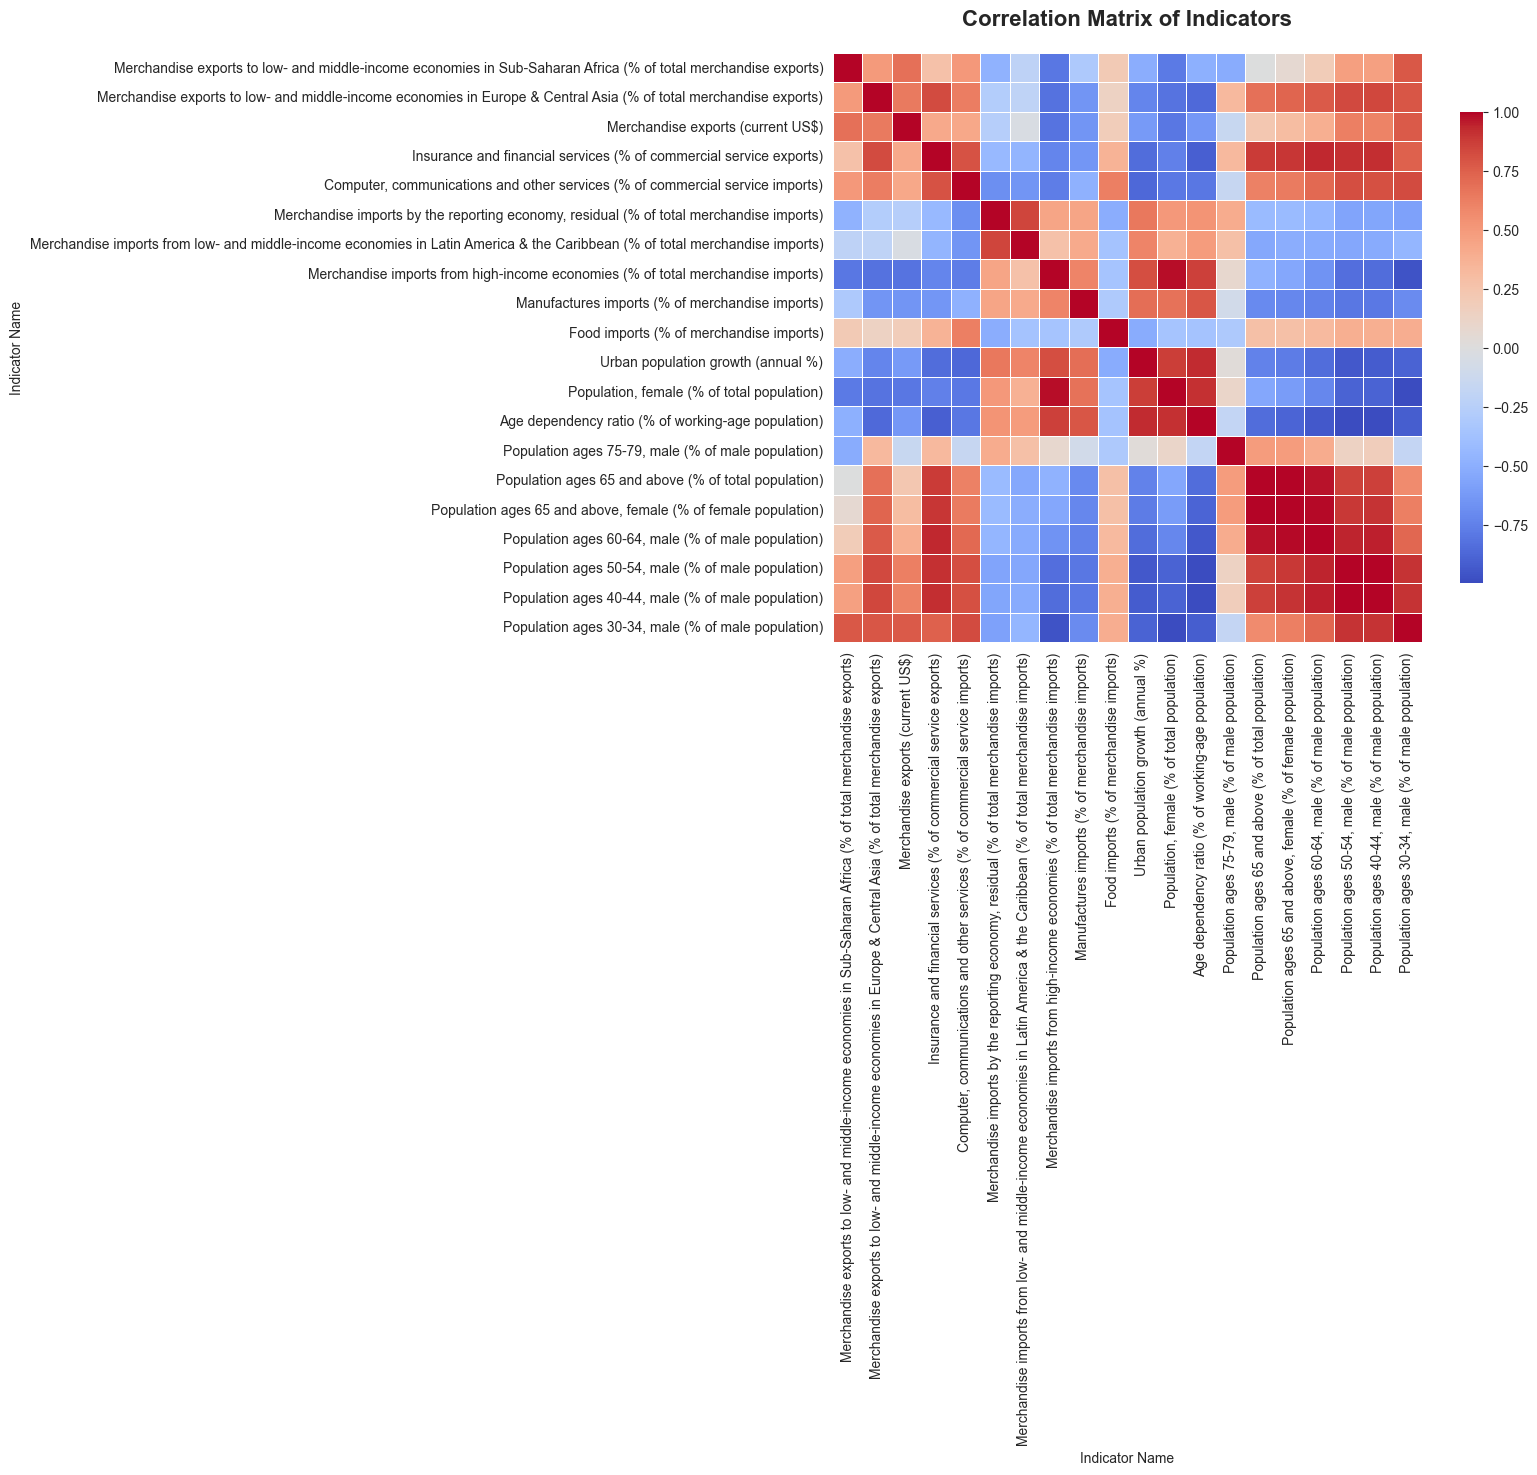

In [22]:
# Calculate correlation matrix
correlation_matrix = pca_data_filled.corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Indicators', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [23]:
# Find highly correlated pairs
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if corr_pairs:
    print("Highly correlated indicator pairs (|r| > 0.7):")
    for pair in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{pair[0][:40]:40s} <-> {pair[1][:40]:40s}: {pair[2]:.3f}")
else:
    print("No highly correlated pairs found (this is good for PCA diversity!)")

Highly correlated indicator pairs (|r| > 0.7):
Age dependency ratio (% of working-age p <-> Population ages 40-44, male (% of male p: -0.998
Population ages 50-54, male (% of male p <-> Population ages 40-44, male (% of male p: 0.997
Population ages 65 and above (% of total <-> Population ages 65 and above, female (% : 0.996
Age dependency ratio (% of working-age p <-> Population ages 50-54, male (% of male p: -0.994
Population, female (% of total populatio <-> Population ages 30-34, male (% of male p: -0.993
Population ages 65 and above, female (%  <-> Population ages 60-64, male (% of male p: 0.986
Merchandise imports from high-income eco <-> Population, female (% of total populatio: 0.980
Population ages 65 and above (% of total <-> Population ages 60-64, male (% of male p: 0.972
Merchandise imports from high-income eco <-> Population ages 30-34, male (% of male p: -0.959
Population ages 60-64, male (% of male p <-> Population ages 40-44, male (% of male p: 0.950
Urban population gr

## Step 10: Save Prepared Data

In [24]:
# Save the prepared data for use in the PCA assignment
pca_data_filled.to_csv('prepared_data_for_pca.csv')

print("Data saved successfully!")
print(f"\nFinal dataset ready for PCA:")
print(f"  - Shape: {pca_data_filled.shape}")
print(f"  - Observations (years): {pca_data_filled.shape[0]}")
print(f"  - Features (indicators): {pca_data_filled.shape[1]}")
print(f"  - Missing values: {pca_data_filled.isnull().sum().sum()}")
print(f"\nThis data meets all assignment requirements:")
print(f"  - Has missing values in original data")
print(f"  - Has non-numeric columns (Country Name, Indicator Name)")
print(f"  - Has more than 10 columns ({pca_data_filled.shape[1]} indicators)")
print(f"  - Is African-focused (Sub-Saharan Africa data)")

Data saved successfully!

Final dataset ready for PCA:
  - Shape: (24, 20)
  - Observations (years): 24
  - Features (indicators): 20
  - Missing values: 0

This data meets all assignment requirements:
  - Has missing values in original data
  - Has non-numeric columns (Country Name, Indicator Name)
  - Has more than 10 columns (20 indicators)
  - Is African-focused (Sub-Saharan Africa data)


## Summary

This notebook has completed the following steps:
1. Loaded World Bank Sub-Saharan Africa development indicators
2. Explored data structure and identified missing values
3. Selected indicators with sufficient data completeness
4. Transformed data into proper format for PCA (years as rows, indicators as columns)
5. Handled missing values appropriately
6. Analyzed correlations between indicators
7. Saved prepared data for PCA implementation

Next step: Use the prepared_data_for_pca.csv file in the PCA assignment template.